<a href="https://colab.research.google.com/github/SteelworkerDB/AML_W1/blob/main/AnalisisKmedias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importación de librerías base

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Rectangle # PARA LEYENDAS

In [3]:
#importar sklearn para modelado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
filename='/content/cust_seg.csv'
df=pd.read_csv(filename)
df.head(10)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,9,10,47,3,23,115,0.653,3.947,0.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [6]:
df.drop(['Unnamed: 0','Customer Id'], axis=1, inplace=True)

In [7]:
df['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [8]:
df['Defaulted'].fillna(method='bfill',inplace=True)

In [9]:
X=df.copy()
scaler=StandardScaler()
X=scaler.fit_transform(X)


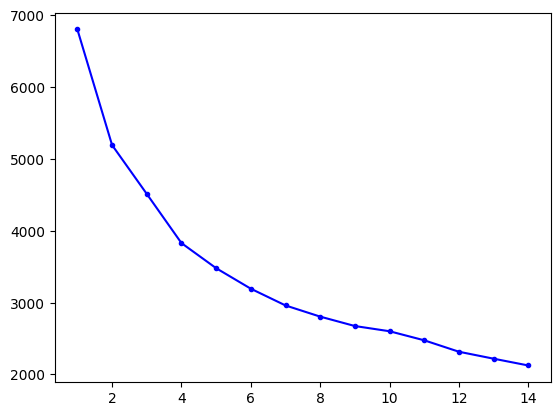

In [10]:
score = []
k_clusters = range(1,15) # Prueba k= 2 a 15
for k in k_clusters:
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(X)
    score.append(-kmeans.score(X))

plt.plot(k_clusters, score,'b.-')

Parece que el codo se encuentra entre 2 y 3.

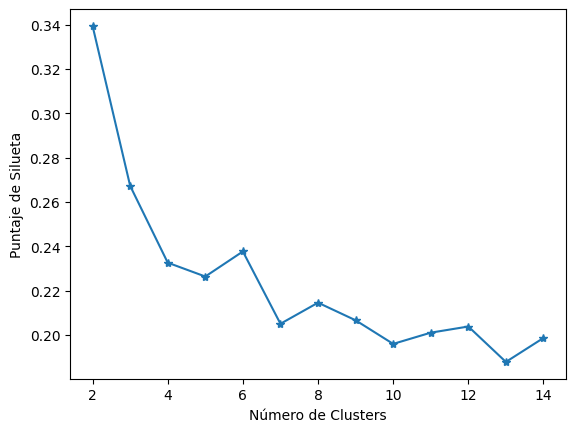

In [11]:
sil_scores = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters = k, n_init='auto')
  kmeans.fit(X)
  sil_scores.append(silhouette_score(X, kmeans.labels_))
# Puntuaciones en plot
plt.plot(range(2, 15), sil_scores, marker = '*')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta');

En este caso 2 clusters es la mejor opción.

In [12]:
kmeans = KMeans(n_clusters=2,n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [13]:
ypred=kmeans.predict(X)
df['Cluster']=pd.Series(ypred)

In [14]:
df.head(10)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0
5,40,1,23,81,0.998,7.831,0.0,10.9,0
6,38,2,4,56,0.442,0.454,0.0,1.6,1
7,42,3,0,64,0.279,3.945,0.0,6.6,1
8,26,1,5,18,0.575,2.215,0.0,15.5,1
9,47,3,23,115,0.653,3.947,0.0,4.0,0


In [15]:
df2=pd.DataFrame(X)

In [16]:
df2.head()

,0,1,2,3,4,5,6,7
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.587313,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.587313,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.702669,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.587313,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.587313,-0.442507


<Axes: xlabel='Income', ylabel='Card Debt'>

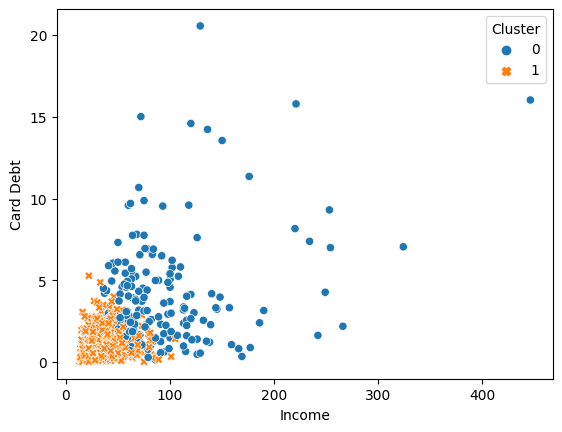

In [17]:

sns.scatterplot(data=df, x="Income", y="Card Debt", hue="Cluster", style='Cluster')


Se observa que en efecto se agrupan las personas con niveles de deuda e ingreso bajos y altos de forma separada, con poca intersección.  

In [18]:
grupos = df.groupby('Cluster', as_index=False).mean()

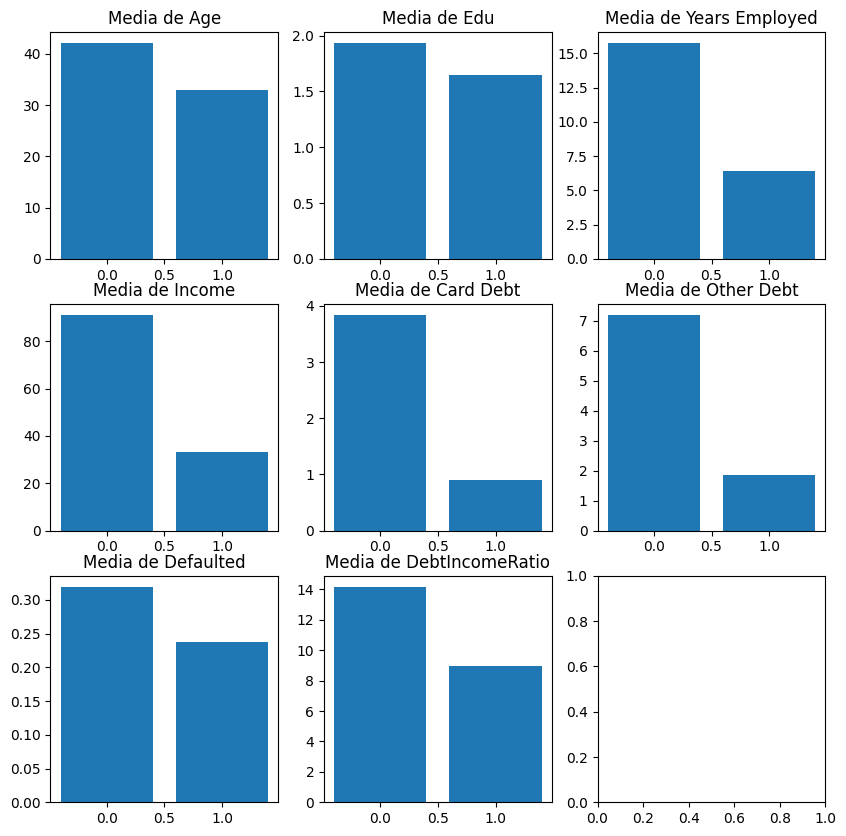

In [22]:
fig, axes = plt.subplots(3,3, figsize = (10, 10))
axes = axes.ravel()
for i, col in enumerate(grupos.columns[1:]):
  axes[i].bar(grupos['Cluster'], grupos[col])
  axes[i].set_title(f'Media de {col}')

El Cluster 0 reùne los valores más altos en todas las características.